In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [5]:
df = pd.read_csv(r"C:\Users\haris\Downloads\titanic.csv")
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [6]:
df.shape

(887, 8)

In [7]:
df.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [9]:
df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [10]:
#Data Analysis

In [11]:
df['Survived'].value_counts()
#545 dead, 345 survived

Survived
0    545
1    342
Name: count, dtype: int64

In [12]:
#Data Visualization

sns.set()

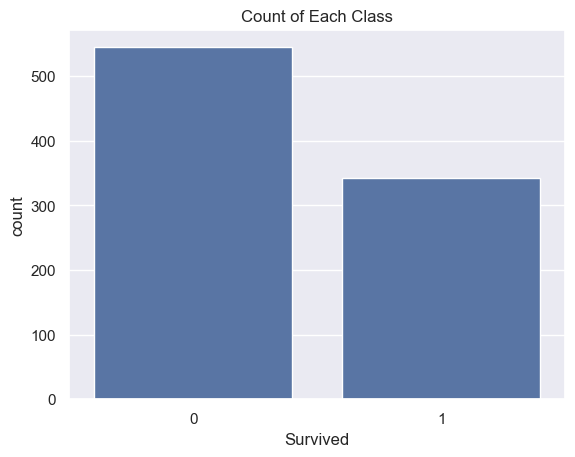

In [17]:
#making a count plot for "Survived" column

sns.countplot(x='Survived', data=df)
plt.title("Count of Each Class")
plt.show()

C:\Users\haris\AppData\Local\Temp\ipykernel_39716\346059801.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=df, palette=['skyblue', 'salmon'])


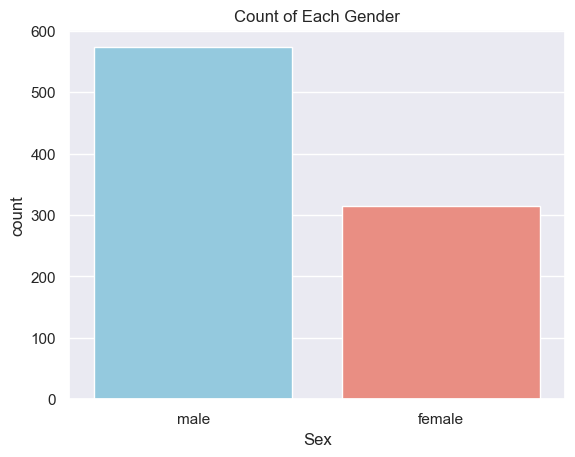

In [21]:
sns.countplot(x='Sex', data=df, palette=['skyblue', 'salmon'])
plt.title("Count of Each Gender")
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

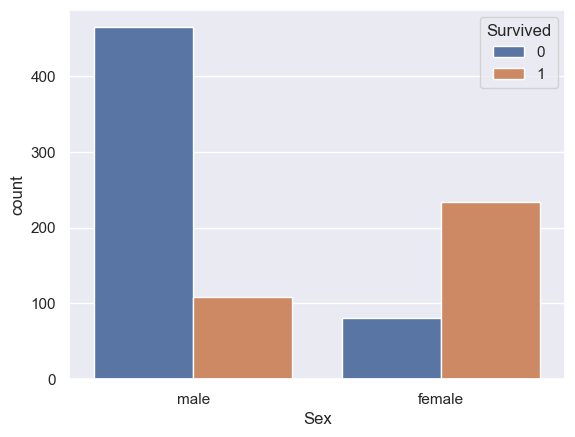

In [23]:
sns.countplot(x ='Sex', hue = 'Survived', data = df)

<Axes: xlabel='Pclass', ylabel='count'>

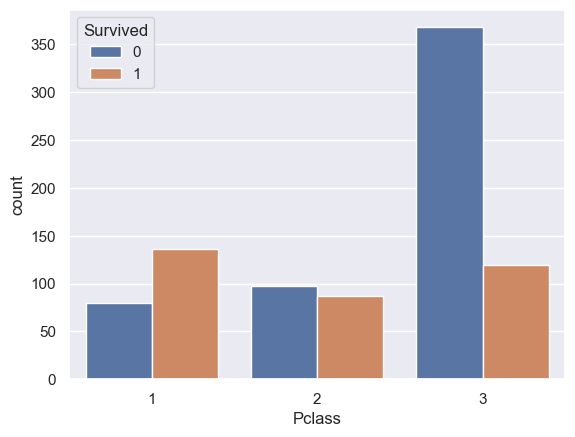

In [27]:
sns.countplot(x ='Pclass', hue = 'Survived', data = df)

In [30]:
#Converting categorical columns to numbers

df.replace({ 'Sex': {'male':0, 'female':1}}, inplace = True)

C:\Users\haris\AppData\Local\Temp\ipykernel_39716\1990290734.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({ 'Sex': {'male':0, 'female':1}}, inplace = True)


In [31]:
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,0,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,1,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,1,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,1,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,0,35.0,0,0,8.0500


In [42]:
X = df.drop(columns = ['Name', 'Survived'], axis =1 )
y = df['Survived']

In [43]:
X.head()

,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500


In [44]:
X.rename(columns={'Siblings/Spouses Aboard': 'sibsp', 'Parents/Children Aboard': 'pArch'}, inplace=True)

In [46]:
X.head()

,Pclass,Sex,Age,sibsp,pArch,Fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500


In [41]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [49]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

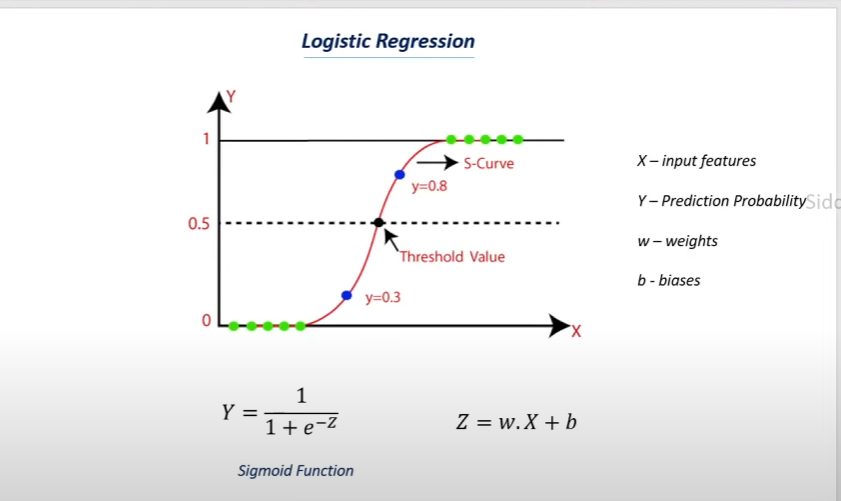

In [54]:
X_train_pred = model.predict(X_train)

In [55]:
print(X_train_pred)

[0 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0
 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0
 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1
 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1
 1 0 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0
 1 0 1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1
 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0
 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 1 1 1
 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0
 0 1 0 1 1 0 0 0 0 0 0 1 

In [57]:
#aCCURACY 

training_accuracy = accuracy_score(y_train, X_train_pred)

In [58]:
print(training_accuracy)

0.8124118476727785


In [59]:
#Evaluation with TEST

X_test_pred = model.predict(X_test)

In [60]:
test_accuracy = accuracy_score(y_test, X_test_pred)
print(test_accuracy)

0.7808988764044944
